## 1. Import Libraries

In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

In [3]:
pip install wordcloud

## 2. Read the Training Data

In [4]:
file_path = r"C:\Users\KIIT\sage\data\train.csv"

train = pd.read_csv(file_path)
train


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-09,Delhi,Cochin,23:05:00,19:00:00,1195,2.0,No Info,9483
1,Jet Airways,2019-06-06,Delhi,Cochin,19:15:00,04:25:00,550,1.0,No Info,14714
2,Multiple Carriers,2019-06-01,Delhi,Cochin,11:40:00,19:00:00,440,1.0,No Info,12524
3,Jet Airways,2019-05-01,Kolkata,Banglore,06:30:00,12:00:00,330,1.0,No Info,14388
4,Spicejet,2019-05-15,Mumbai,Hyderabad,22:45:00,00:15:00,90,0.0,No check-in baggage included,1965
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-21,Delhi,Cochin,06:40:00,18:50:00,730,1.0,No Info,13568
636,Air India,2019-05-09,Delhi,Cochin,13:00:00,19:15:00,375,1.0,No Info,8372
637,Jet Airways,2019-06-27,Banglore,Delhi,11:10:00,14:05:00,175,0.0,No Info,8016
638,Jet Airways,2019-05-06,Banglore,Delhi,18:55:00,22:00:00,185,0.0,No Info,7229


## 2.1 Fixing Data Types

In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [7]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-09,Delhi,Cochin,2024-05-18 23:05:00,2024-05-18 19:00:00,1195,2.0,No Info,9483
1,Jet Airways,2019-06-06,Delhi,Cochin,2024-05-18 19:15:00,2024-05-18 04:25:00,550,1.0,No Info,14714
2,Multiple Carriers,2019-06-01,Delhi,Cochin,2024-05-18 11:40:00,2024-05-18 19:00:00,440,1.0,No Info,12524
3,Jet Airways,2019-05-01,Kolkata,Banglore,2024-05-18 06:30:00,2024-05-18 12:00:00,330,1.0,No Info,14388
4,Spicejet,2019-05-15,Mumbai,Hyderabad,2024-05-18 22:45:00,2024-05-18 00:15:00,90,0.0,No check-in baggage included,1965
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-03-21,Delhi,Cochin,2024-05-18 06:40:00,2024-05-18 18:50:00,730,1.0,No Info,13568
636,Air India,2019-05-09,Delhi,Cochin,2024-05-18 13:00:00,2024-05-18 19:15:00,375,1.0,No Info,8372
637,Jet Airways,2019-06-27,Banglore,Delhi,2024-05-18 11:10:00,2024-05-18 14:05:00,175,0.0,No Info,8016
638,Jet Airways,2019-05-06,Banglore,Delhi,2024-05-18 18:55:00,2024-05-18 22:00:00,185,0.0,No Info,7229


## 3. High-level Summary of Data

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [9]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,646.429688,0.789062,9012.281250
std,523.966703,0.650657,4483.075625
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5188.250000
50%,520.000000,1.000000,8366.000000
75%,940.000000,1.000000,12259.500000
max,2315.000000,3.000000,36983.000000


In [10]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,224,266,266,344.0,491


## 4. High-level analysis of Missing Values

In [11]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## 5. High-level analysis of Outliers

In [48]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [49]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-04-09,Delhi,Cochin,2024-05-18 23:05:00,2024-05-18 19:00:00,1195,2.0,No Info,9483,-1
4,Spicejet,2019-05-15,Mumbai,Hyderabad,2024-05-18 22:45:00,2024-05-18 00:15:00,90,0.0,No check-in baggage included,1965,-1
6,Jet Airways,2019-06-03,Delhi,Cochin,2024-05-18 21:25:00,2024-05-18 19:00:00,1295,2.0,No Info,13292,-1
7,Indigo,2019-05-21,Mumbai,Hyderabad,2024-05-18 02:35:00,2024-05-18 04:05:00,90,0.0,No Info,2754,-1
9,Jet Airways,2019-06-06,Kolkata,Banglore,2024-05-18 09:35:00,2024-05-18 14:25:00,1730,1.0,No Info,12692,-1
...,...,...,...,...,...,...,...,...,...,...,...
623,Jet Airways,2019-06-01,Delhi,Cochin,2024-05-18 09:40:00,2024-05-18 04:25:00,1125,2.0,No Info,13014,-1
627,Jet Airways,2019-03-24,Kolkata,Banglore,2024-05-18 21:10:00,2024-05-18 23:25:00,1575,1.0,In-flight meal not included,10031,-1
630,Air India,2019-06-06,Delhi,Cochin,2024-05-18 05:55:00,2024-05-18 19:15:00,800,2.0,No Info,10861,-1
633,Indigo,2019-06-27,Mumbai,Hyderabad,2024-05-18 19:05:00,2024-05-18 20:35:00,90,0.0,No Info,2754,-1


## 6. Pair Plots

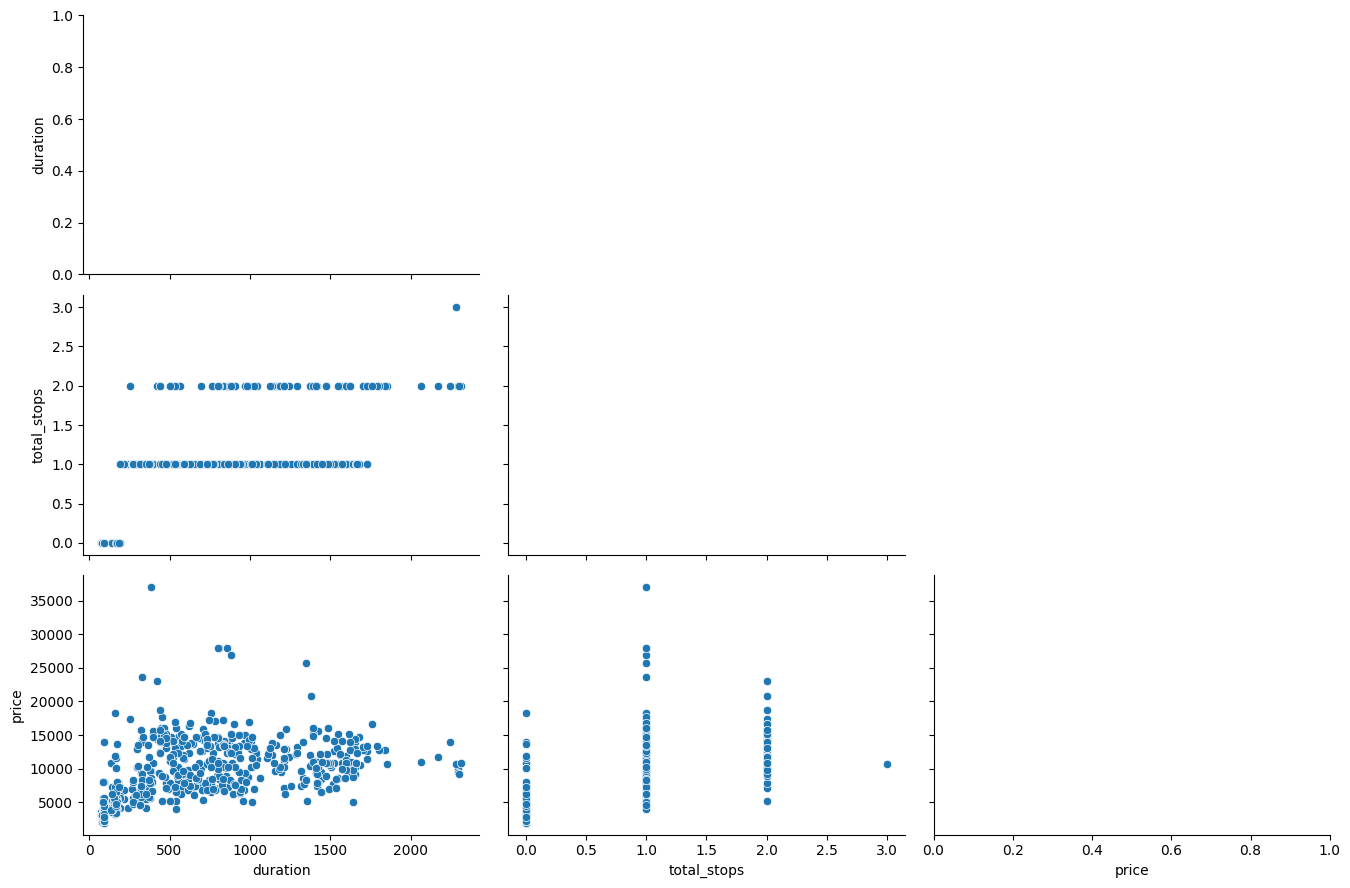

In [50]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

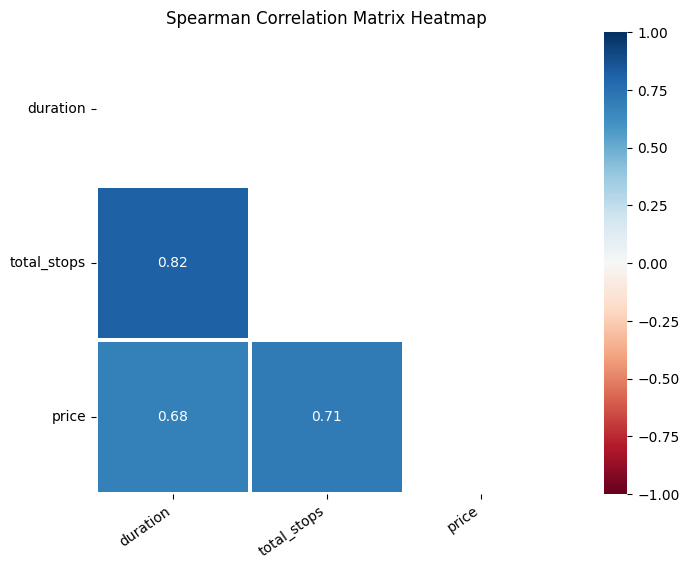

In [51]:
eda_helper_functions.correlation_heatmap(train)

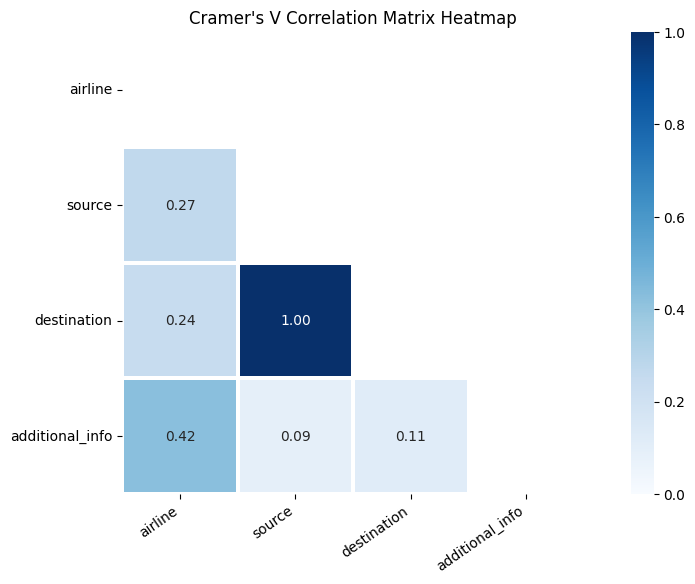

In [52]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [53]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 airline

In [54]:
train.airline

0            Jet Airways
1            Jet Airways
2      Multiple Carriers
3            Jet Airways
4               Spicejet
             ...        
635    Multiple Carriers
636            Air India
637          Jet Airways
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [55]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1            Jet Airways
2      Multiple Carriers
3            Jet Airways
4               Spicejet
             ...        
635    Multiple Carriers
636            Air India
637          Jet Airways
638          Jet Airways
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,224


,count,percentage
category,,
Jet Airways,224,0.350000
Indigo,116,0.181250
Air India,102,0.159375
Multiple Carriers,69,0.107813
Spicejet,60,0.093750
Vistara,30,0.046875
Air Asia,23,0.035937
Goair,15,0.023438
Trujet,1,0.001563


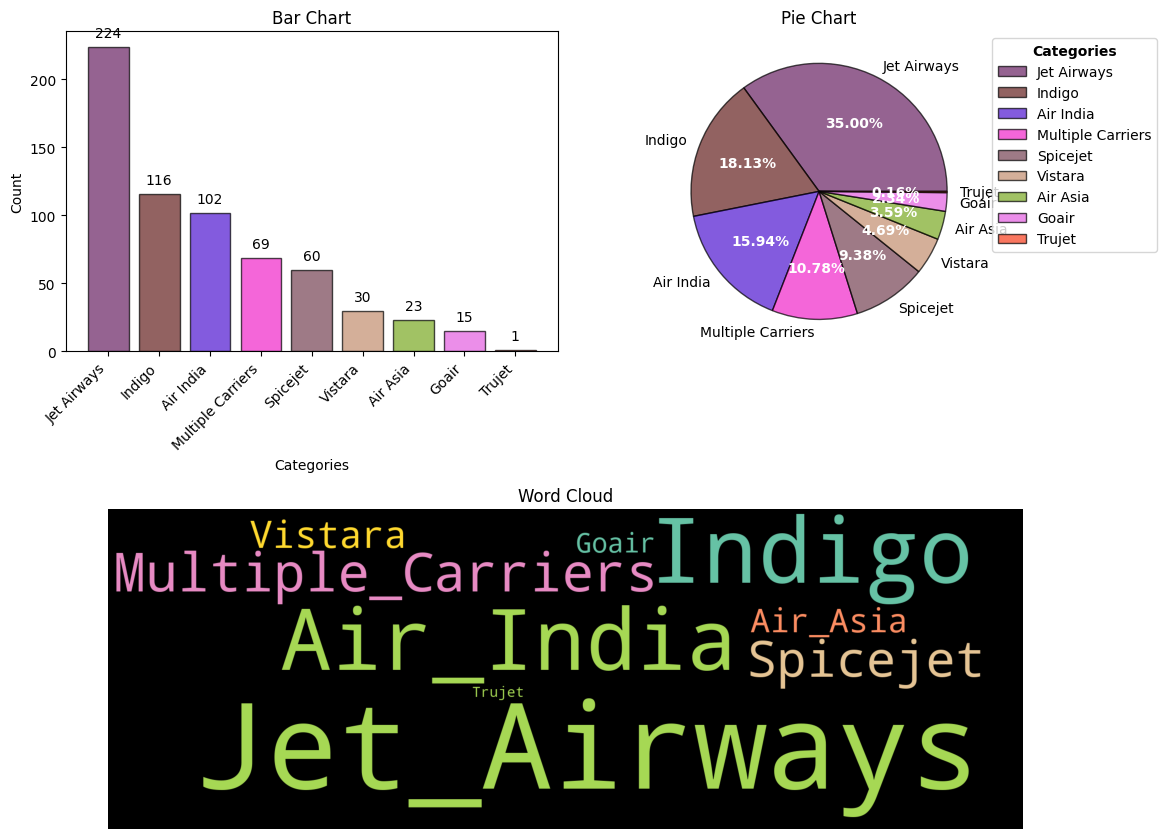

In [56]:
eda_helper_functions.cat_univar_plots(train, "airline")

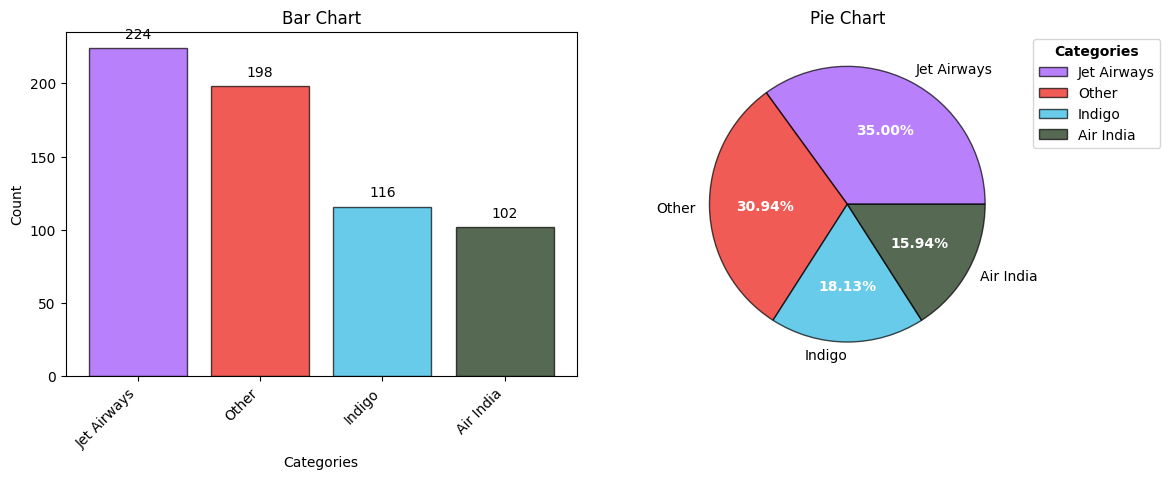

In [57]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

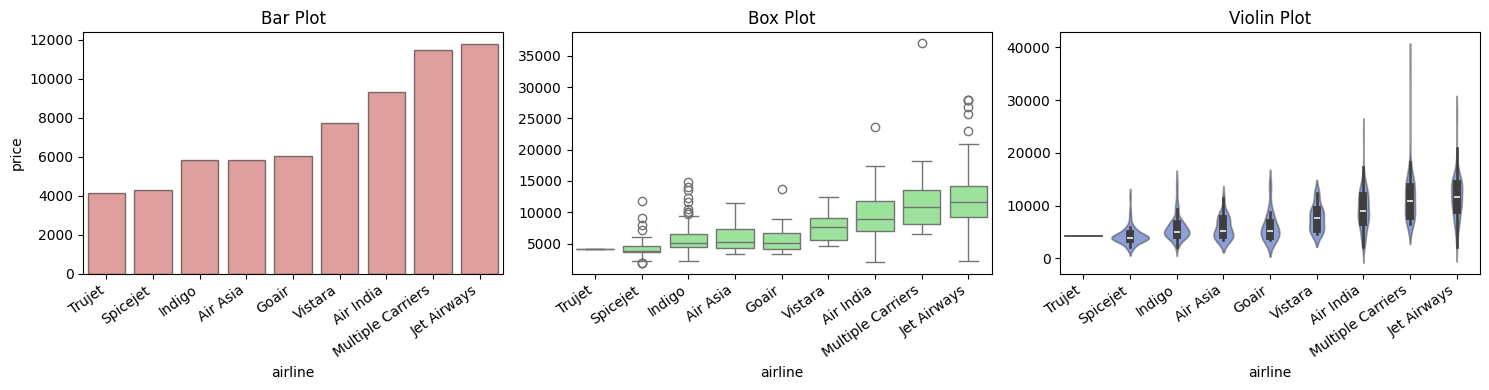

In [58]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [59]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 52.364244593795256
- p-value              : 5.908425052312871e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 309.7461471157468
- p-value              : 3.4649315198209122e-62
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


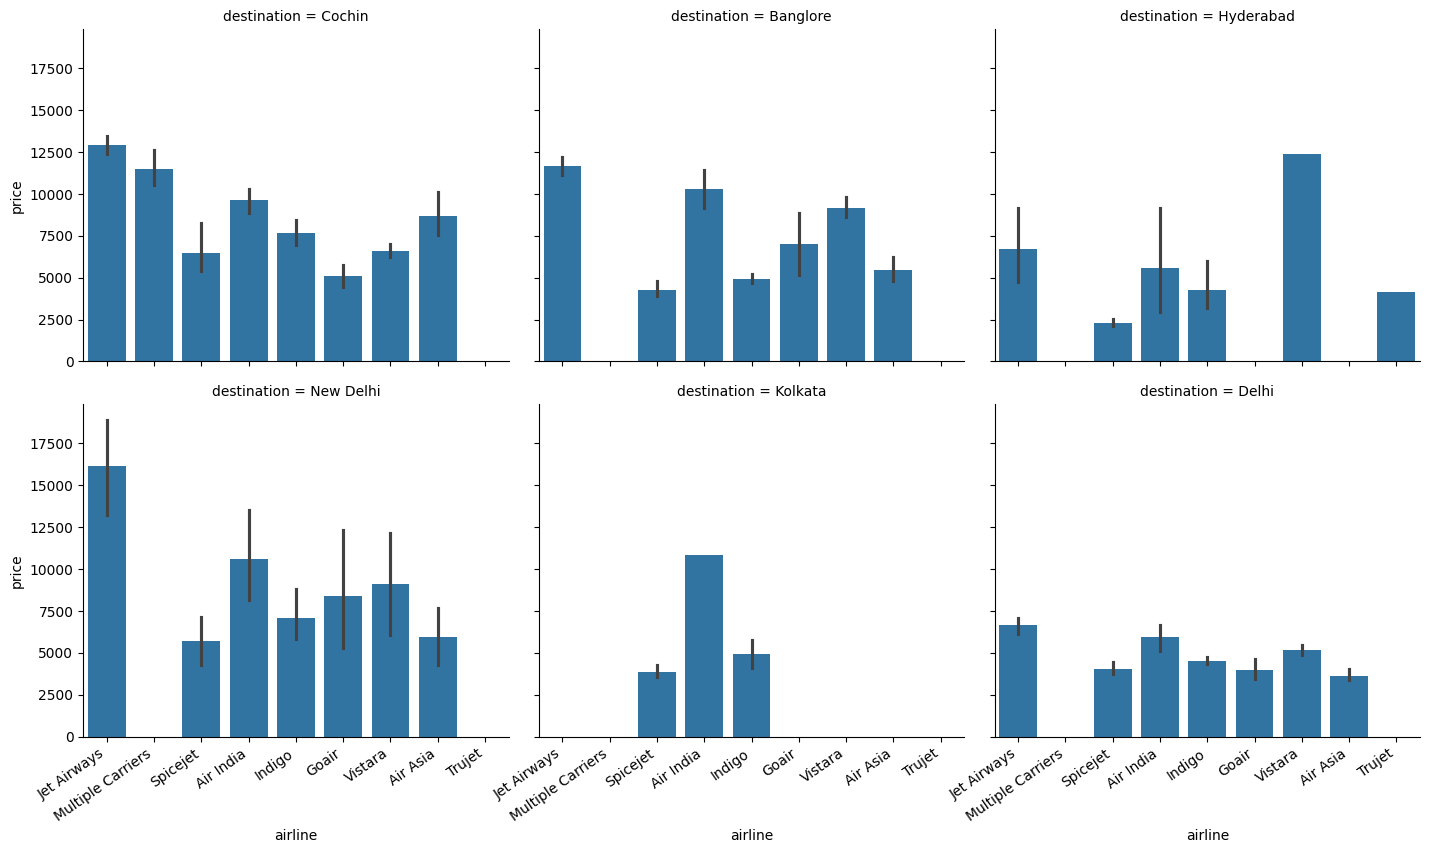

In [60]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

## 8.2 date_of_journey

In [61]:
train.date_of_journey

0     2019-04-09
1     2019-06-06
2     2019-06-01
3     2019-05-01
4     2019-05-15
         ...    
635   2019-03-21
636   2019-05-09
637   2019-06-27
638   2019-05-06
639   2019-06-06
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

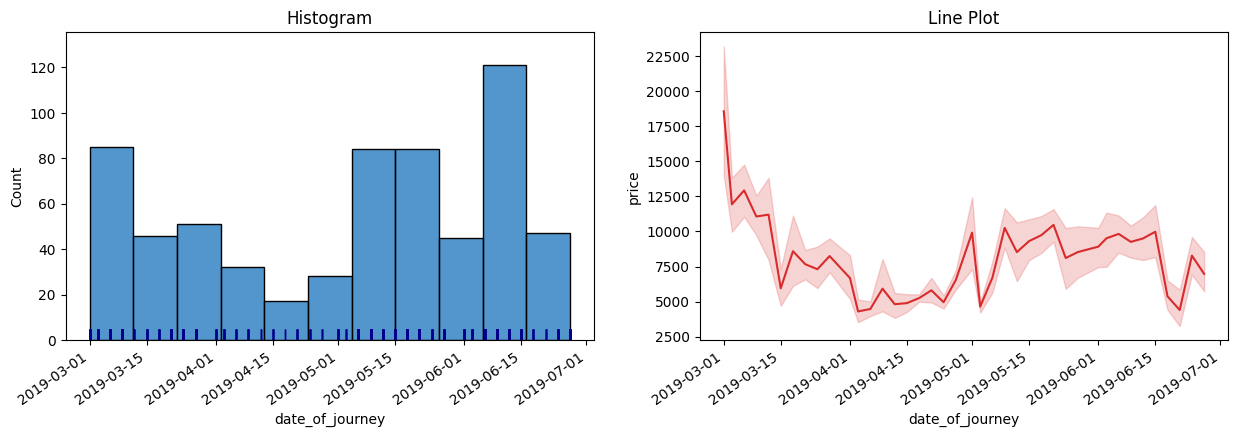

In [62]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

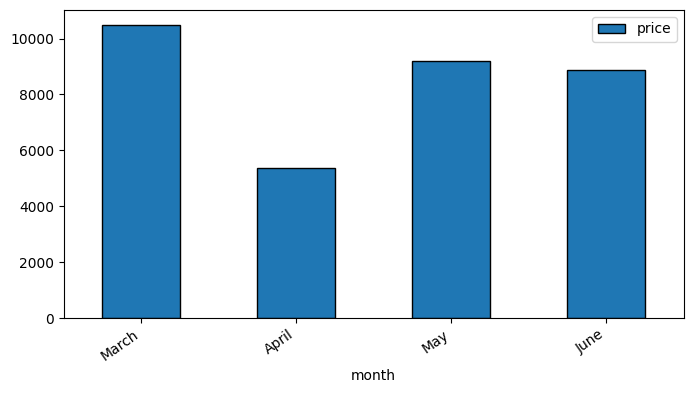

In [63]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

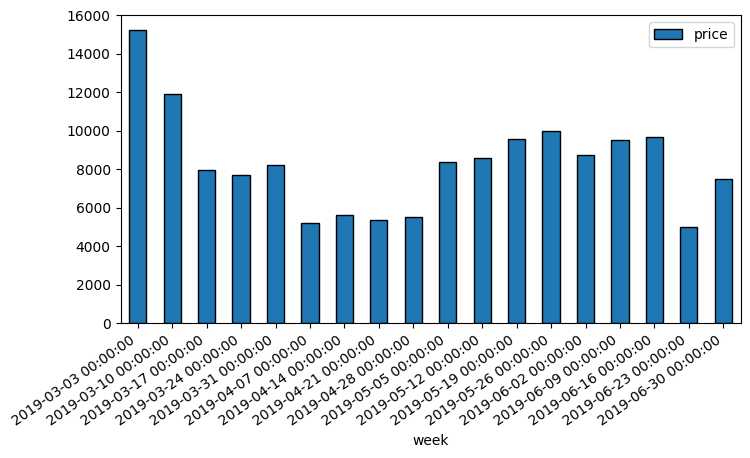

In [64]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

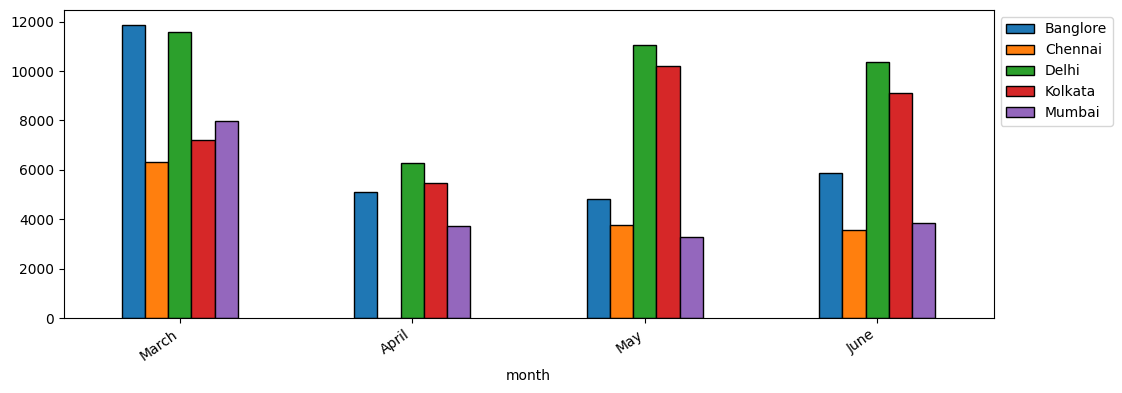

In [65]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

## 8.3 dep_time

In [66]:
train.dep_time

0     2024-05-18 23:05:00
1     2024-05-18 19:15:00
2     2024-05-18 11:40:00
3     2024-05-18 06:30:00
4     2024-05-18 22:45:00
              ...        
635   2024-05-18 06:40:00
636   2024-05-18 13:00:00
637   2024-05-18 11:10:00
638   2024-05-18 18:55:00
639   2024-05-18 14:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

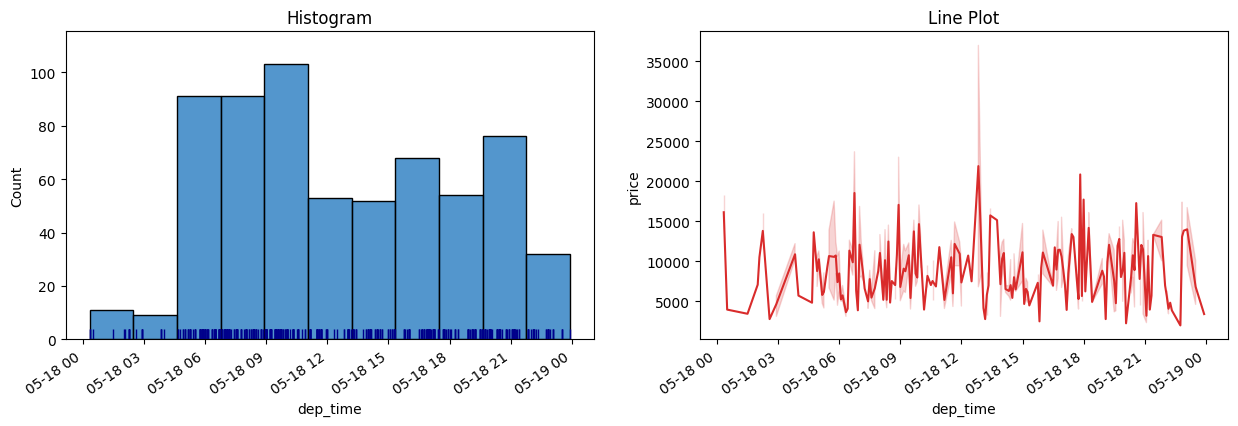

In [67]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

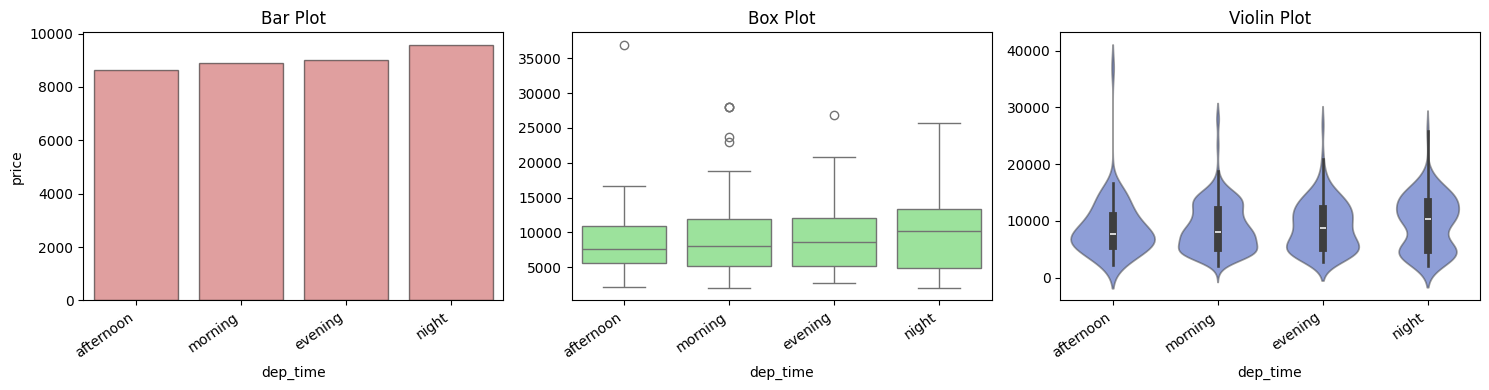

In [68]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

## 8.4 duration

In [69]:
train.duration

0      1195
1       550
2       440
3       330
4        90
       ... 
635     730
636     375
637     175
638     185
639     865
Name: duration, Length: 640, dtype: int64

In [70]:
eda_helper_functions.num_summary(train, "duration")

0      1195
1       550
2       440
3       330
4        90
       ... 
635     730
636     375
637     175
638     185
639     865
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,520.00
75,940.00
90,1485.50
95,1630.00
99,2129.05


,value
mean,646.429688
trimmed mean (5%),611.449653
trimmed mean (10%),582.392578
median,520.000000


,value
var,274541.106160
std,523.966703
IQR,770.000000
mad,355.000000
coef_variance,0.810555


,value
skewness,0.884956
kurtosis,-0.120245


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 9.899603713281644e-22
Test Statistic       : 0.8811317374920489
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.21003762739622
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [71]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    520.0
0.75    940.0
Name: duration, dtype: float64

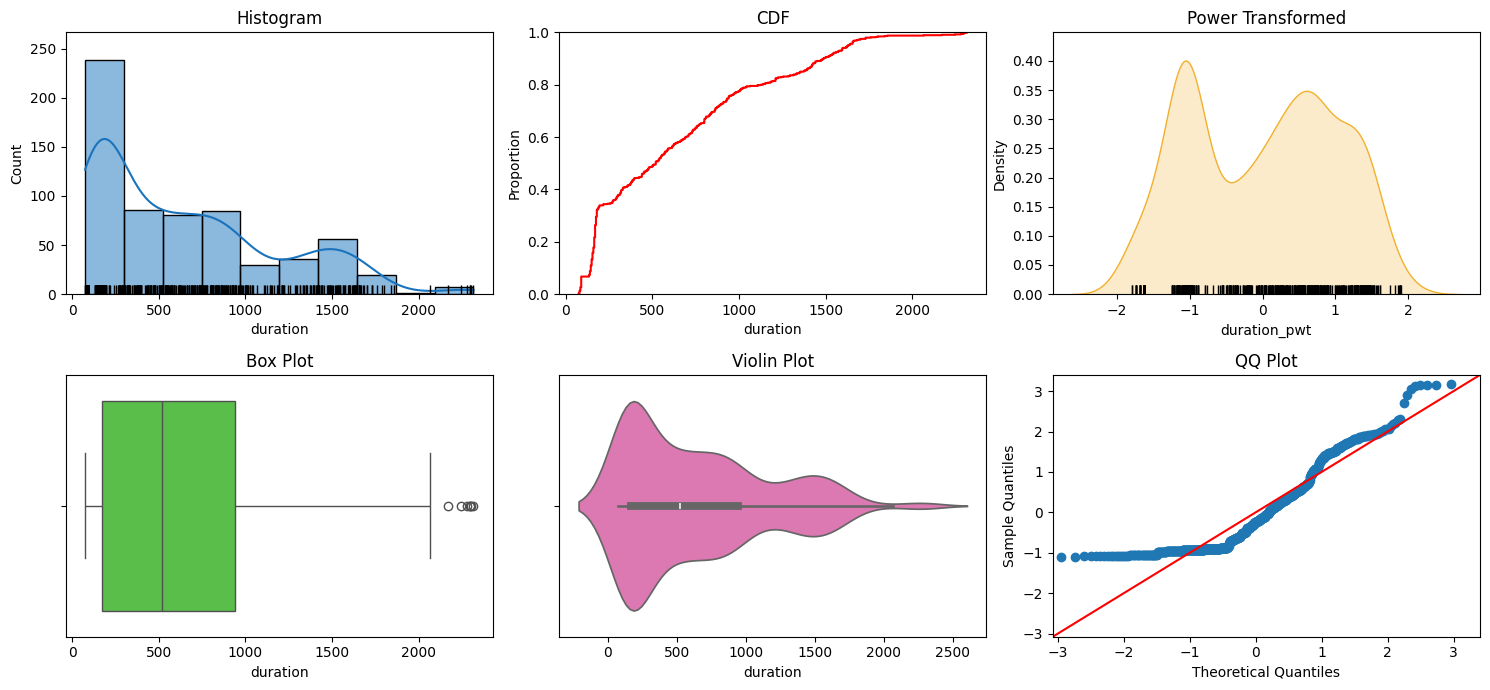

In [72]:
eda_helper_functions.num_univar_plots(train, "duration")

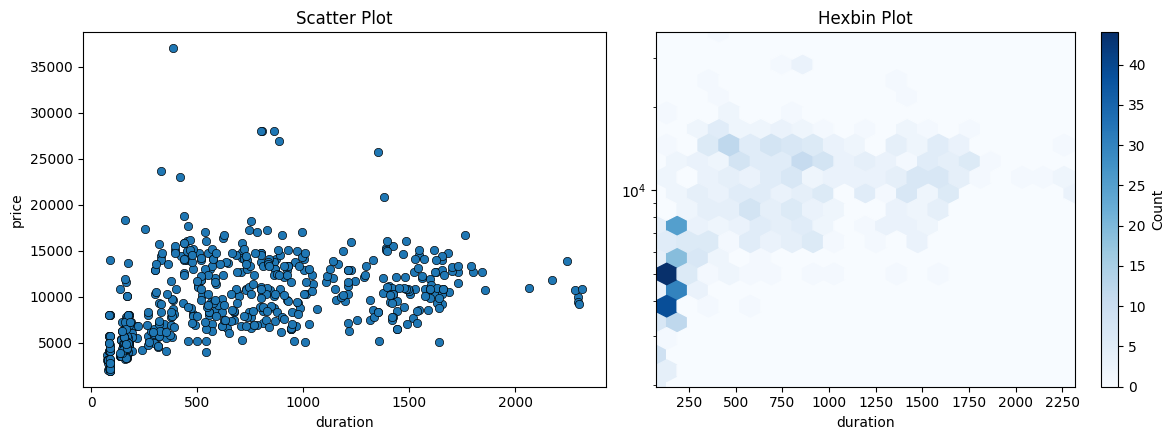

In [73]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [74]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.49155873922579907
- p-value              : 3.074439576544894e-40
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6815692606049595
- p-value              : 1.3485265603504624e-88
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


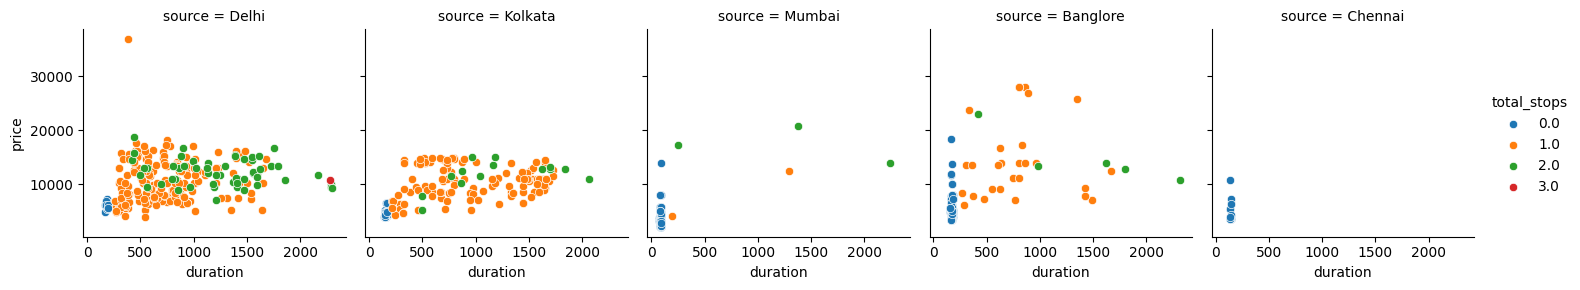

In [75]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

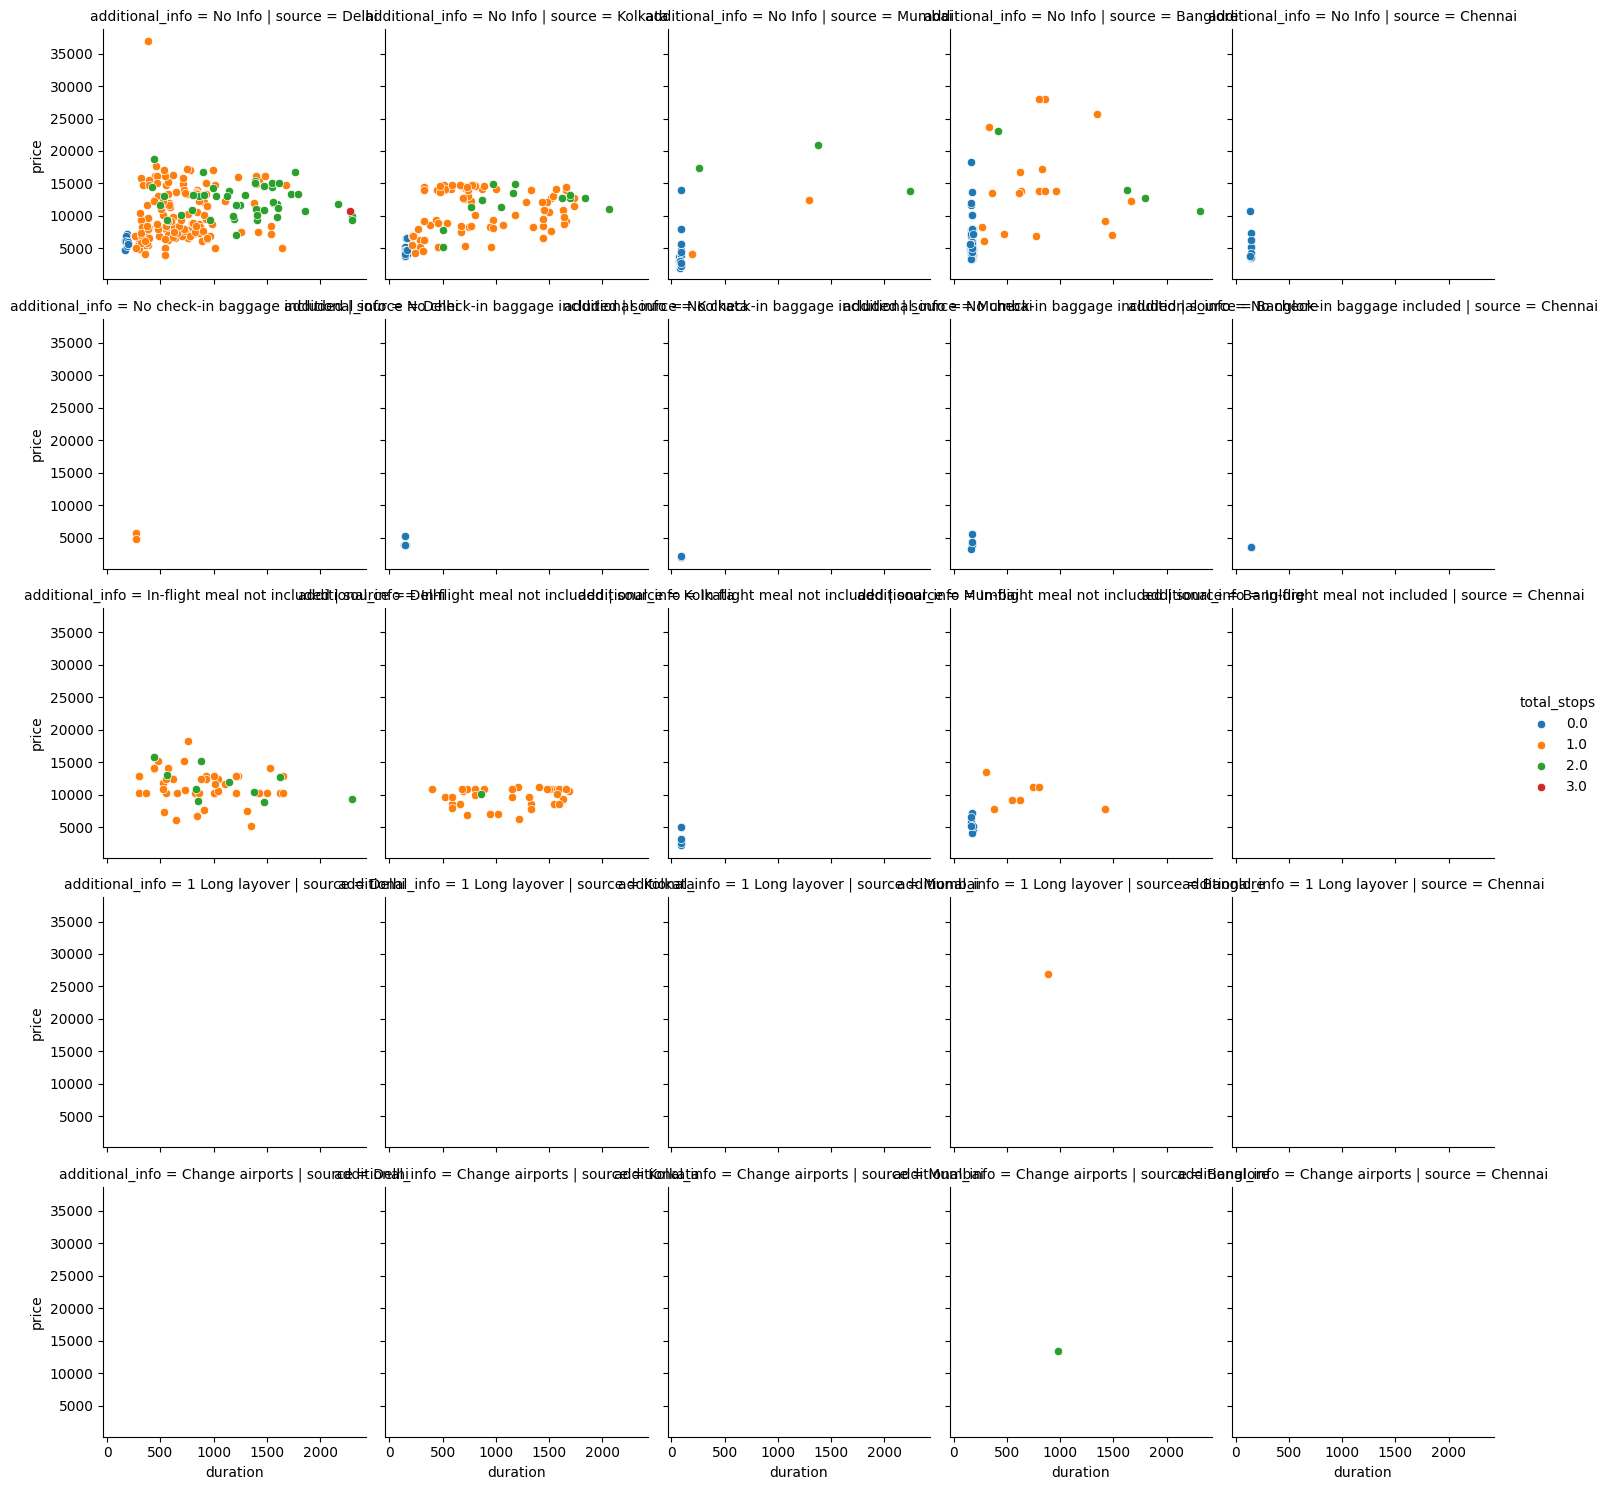

In [76]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [77]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -985.0
Upper Limit : 2095.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
566,Air India,2019-03-03,Delhi,Cochin,2024-05-18 07:05:00,2024-05-18 19:15:00,2170,2.0,No Info,11762
441,Air India,2019-03-06,Mumbai,Hyderabad,2024-05-18 06:00:00,2024-05-18 19:25:00,2245,2.0,No Info,13904
205,Air India,2019-06-06,Delhi,Cochin,2024-05-18 05:15:00,2024-05-18 19:15:00,2280,3.0,No Info,10703
74,Air India,2019-06-09,Delhi,Cochin,2024-05-18 05:00:00,2024-05-18 19:15:00,2295,2.0,No Info,9968
184,Air India,2019-06-12,Delhi,Cochin,2024-05-18 05:00:00,2024-05-18 19:15:00,2295,2.0,No Info,9443
506,Jet Airways,2019-03-27,Delhi,Cochin,2024-05-18 05:25:00,2024-05-18 19:45:00,2300,2.0,In-flight meal not included,9254
241,Air India,2019-03-18,Banglore,New Delhi,2024-05-18 08:50:00,2024-05-18 23:25:00,2315,2.0,No Info,10783


## 8.5 additional_info

In [78]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2                           No Info
3                           No Info
4      No check-in baggage included
                   ...             
635                         No Info
636                         No Info
637                         No Info
638                         No Info
639     In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,491


,count,percentage
category,,
No Info,491,0.767188
In-flight meal not included,119,0.185938
No check-in baggage included,28,0.043750
1 Long layover,1,0.001563
Change airports,1,0.001563


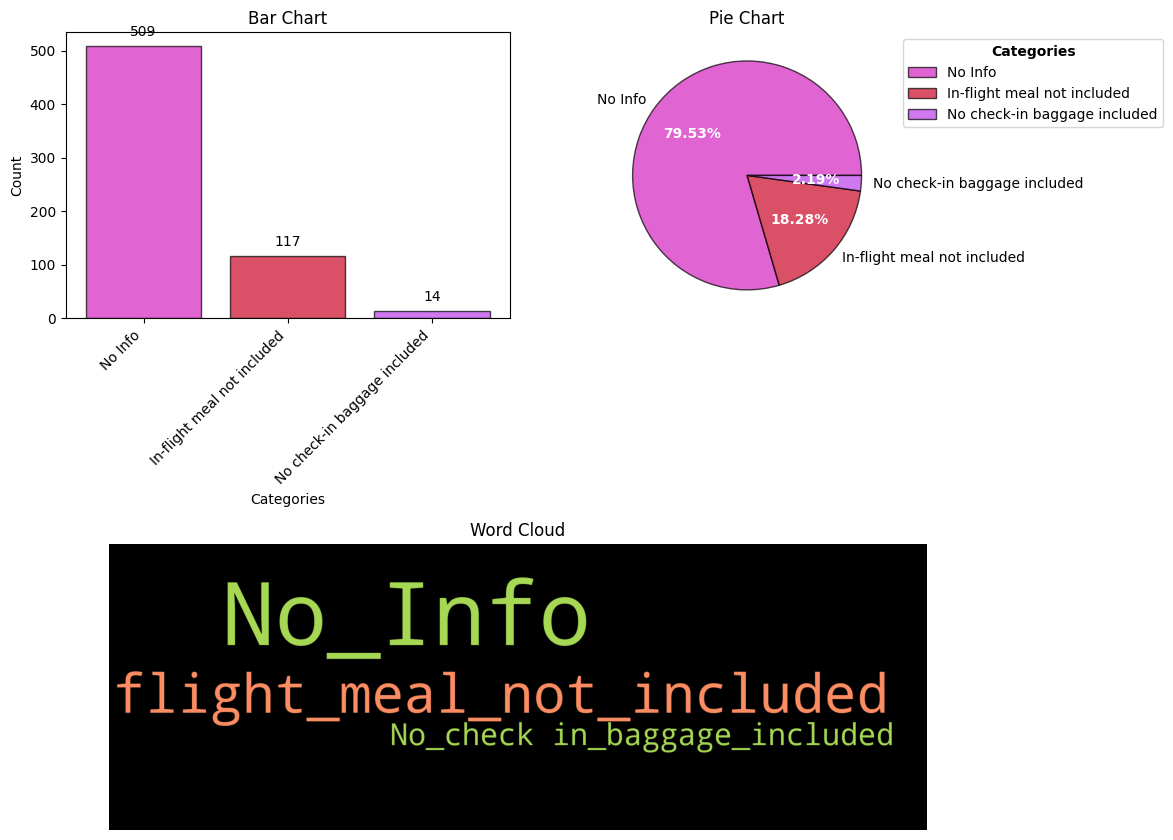

In [50]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

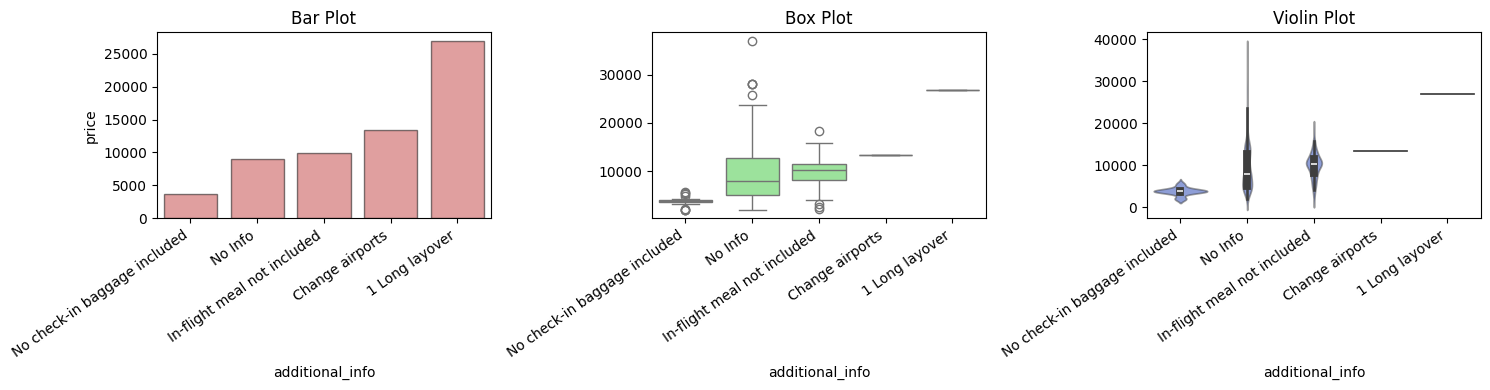

In [81]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

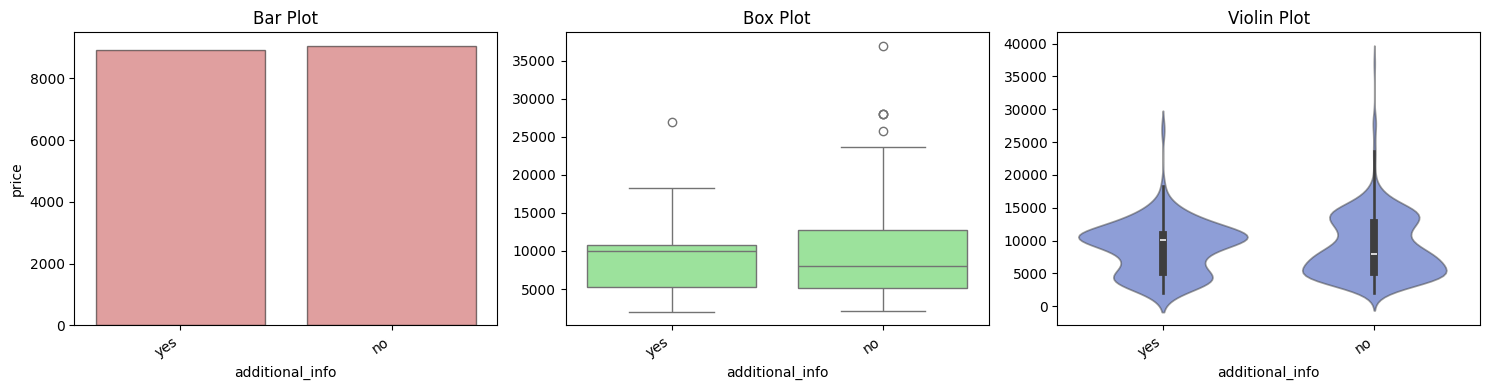

In [82]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)